# Data Mining Final Project - NBA Game Winning Forecasting
## PCA and Data Visualization
Reference: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 25}

matplotlib.rc('font', **font)

# @param dfFile: pandas.DataFrame ('nba_preprocessed.csv')
# @param dateStart, dateEnd: str in the format of 'YYYY-MM-DD'
# @param attriToDrop: list[str]
# @return X, Y: pandas.DataFrame
# featureExtraction() outputs X, Y for model training.
# Game date can be assigned
# Attribute to be dropped can be assigned
def featureExtraction(dfFile, dateStart='1000-01-01', dateEnd='2999-12-31', attriToDrop=None):
    df = pd.read_csv(dfFile)
    
    # Date selection
    df = df.loc[(df.Date_A > dateStart) & (df.Date_A < dateEnd), :].reset_index(drop=True)
    
    # Get label Y
    Y = df[['W/L_A']]
    Y = Y.rename(columns={'W/L_A': 'Label'})
    
    # Get attributes X
    attriToDrop = [x + '_A' for x in attriToDrop] + [x + '_B' for x in attriToDrop] if attriToDrop else []
    colToDrop = ['Team_A', 'Date_A', 'W/L_A', 'Score_A', 'Opponent_A', 'Team_B', 'Date_B', 'W/L_B', 'Home/Away_B', 'Score_B', 'Opponent_B']
    colToDrop += attriToDrop if attriToDrop else []
    X = df.drop(columns = colToDrop)
    
    return X, Y

## Feature Extraction

In [2]:
dfFile = 'nba_preprocessed.csv'
dateStart = '2017-08-01'
dateEnd = '2018-05-01'
attriToDrop = ['FGM', 'FGA', '3P%', '3PA', '3PM', 'FTM', 'FTA', 'OREB', 'DREB', 'PTS']
X, Y = featureExtraction(dfFile, dateStart, dateEnd, attriToDrop)

In [3]:
X

,Home/Away_A,FG%_A,FT%_A,REB_A,AST_A,STL_A,BLK_A,TOV_A,PF_A,FG%_B,FT%_B,REB_B,AST_B,STL_B,BLK_B,TOV_B,PF_B
0,0,0.468,0.917,38,21,4,3,20,18,0.506,0.938,36,28,9,5,15,18
1,1,0.435,0.600,58,25,7,2,16,19,0.365,0.692,39,15,6,3,13,21
2,1,0.488,0.783,44,27,5,2,23,22,0.440,0.929,38,24,13,3,15,24
3,0,0.384,0.600,50,18,6,1,13,23,0.475,0.808,49,18,5,5,14,16
4,0,0.462,0.739,46,24,8,4,11,12,0.416,1.000,43,23,7,4,12,21
5,0,0.505,0.864,46,23,7,7,6,21,0.406,0.677,56,24,5,4,15,18
6,0,0.412,0.710,36,20,13,5,13,22,0.500,0.913,49,27,8,10,22,27
7,1,0.534,0.655,43,35,9,4,12,20,0.494,0.640,38,20,7,4,13,25
8,1,0.450,0.560,41,17,9,6,17,16,0.468,0.636,41,23,9,6,23,24
9,1,0.460,0.815,46,26,9,6,17,18,0.549,0.529,41,38,13,4,13,23


In [4]:
Y

,Label
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,1
9,0


## PCA
Standardization features to mean = 0 and variance = 1 before applying PCA

In [5]:
from sklearn.preprocessing import StandardScaler
features = list(X.columns)
X_val = X.loc[:, features].values

# Feature standardization
X_val = StandardScaler().fit_transform(X_val)
X_val

array([[-1.        ,  0.12341187,  1.41736309, ...,  0.07437253,
         0.34818507, -0.43991488],
       [ 1.        , -0.47797932, -1.60764926, ..., -0.72282323,
        -0.18916454,  0.27189652],
       [ 1.        ,  0.48789139,  0.13865125, ..., -0.72282323,
         0.34818507,  0.98370792],
       ...,
       [ 1.        ,  1.50843402, -1.26411473, ...,  0.47297041,
        -1.53253855, -0.91445581],
       [-1.        ,  1.10750656, -0.96829334, ..., -1.91861687,
        -0.18916454, -0.91445581],
       [-1.        , -2.04524122,  1.01657281, ...,  0.47297041,
         0.34818507,  0.03462606]])

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_val_pca = pca.fit_transform(X_val)
# X_PCA = pd.DataFrame(data = X_val_pca, columns = ['PC1', 'PC2'])
X_PCA = pd.DataFrame(data = X_val_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
X_PCA
pca.explained_variance_ratio_

array([0.13532289, 0.12330187, 0.1176222 , 0.09220649, 0.07085424])

Number of label 0 = 1230
Number of label 1 = 1230


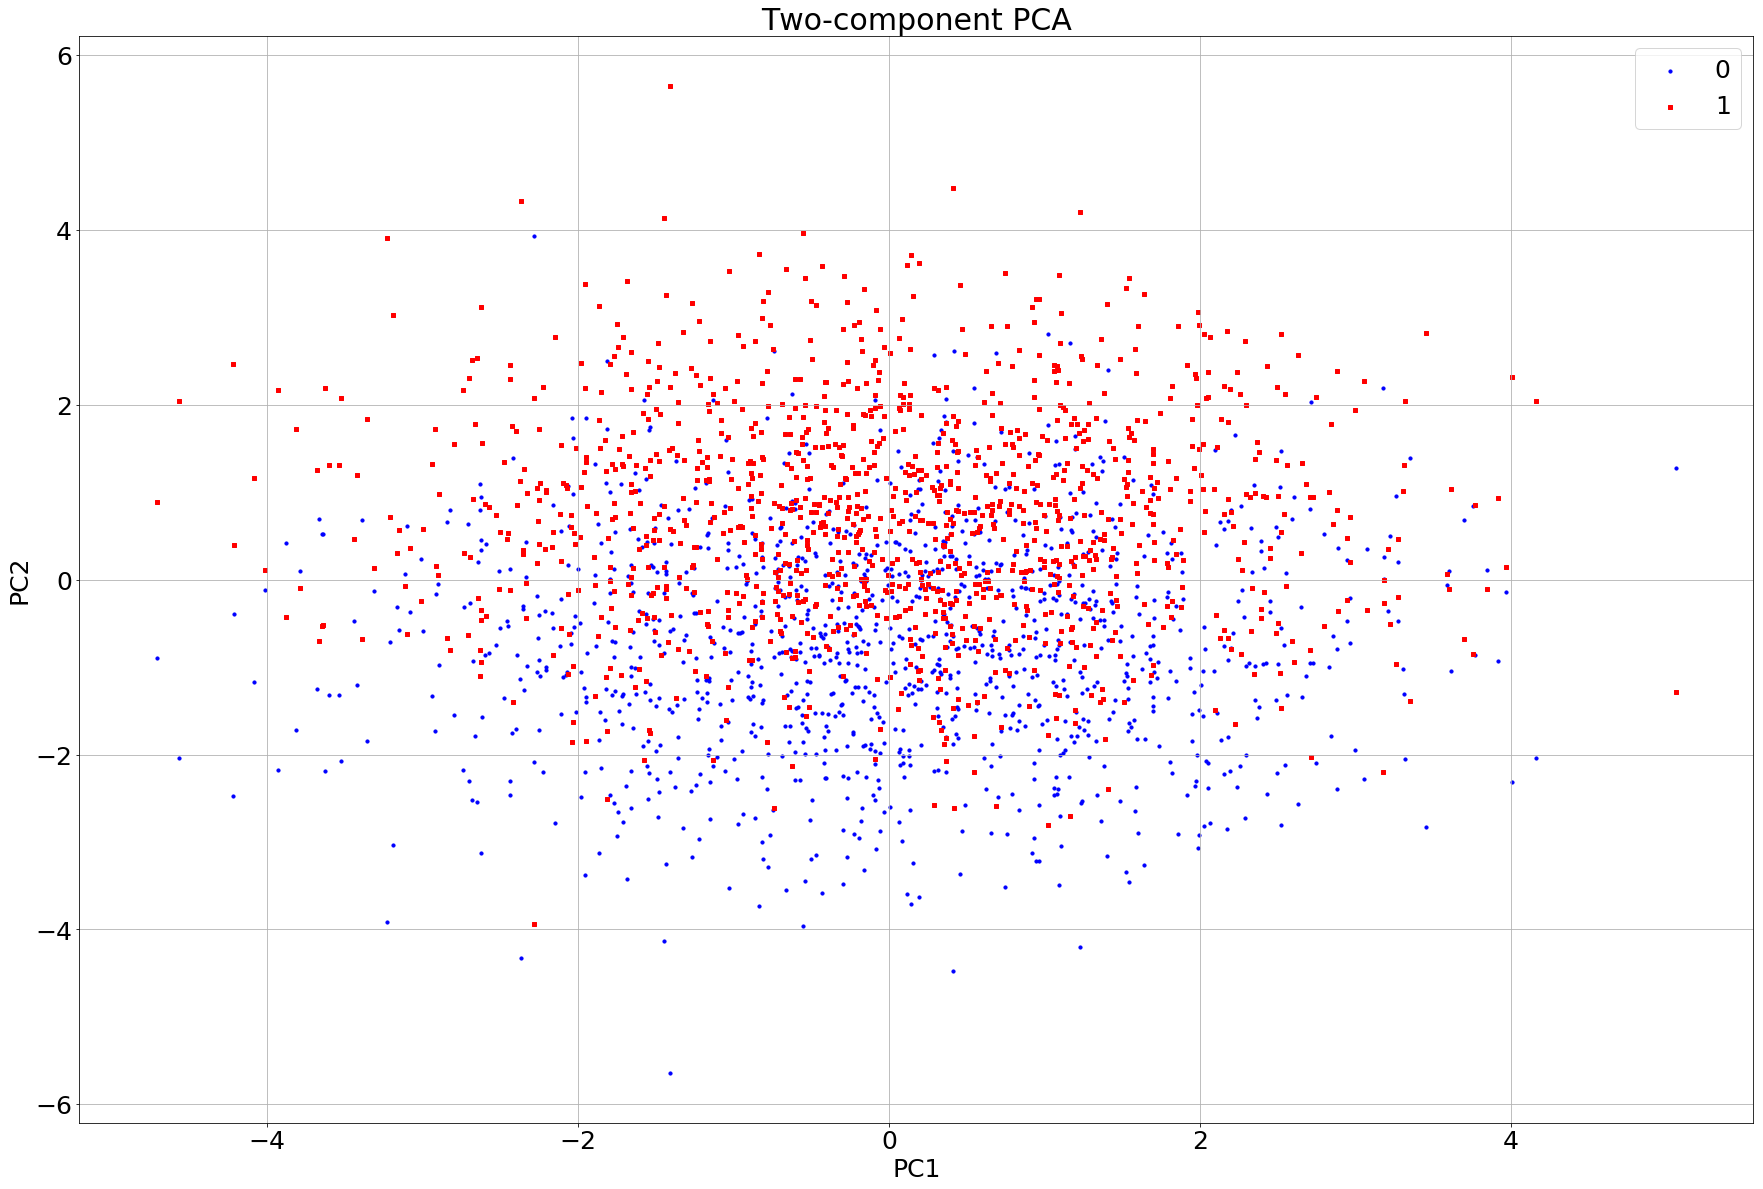

In [7]:
plt.figure(figsize=(30, 20))
matplotlib.rcParams.update({'font.size': 25})
labels = [0, 1]
colors = ['b', 'r']
markers = ['o', 's']
for label, c, m in zip(labels, colors, markers):
    indicesToKeep = Y['Label'] == label
    print('Number of label', label, '=', list(indicesToKeep).count(label))
    plt.scatter(X_PCA.loc[indicesToKeep, 'PC1'], X_PCA.loc[indicesToKeep, 'PC2'], color=c, marker=m, s=10)
plt.grid(True)
plt.legend(labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Two-component PCA')
plt.show()